In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

drive.mount("/content/drive")
path = "/content/drive/My Drive/Project Machine Learning/creditcard.csv"
df = pd.read_csv(path)

# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

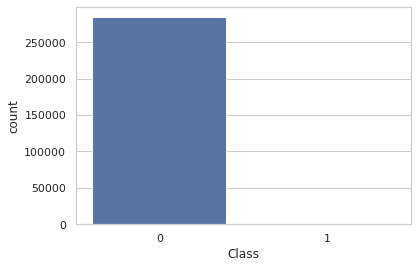

In [ ]:
sns.countplot(x="Class", data=df)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

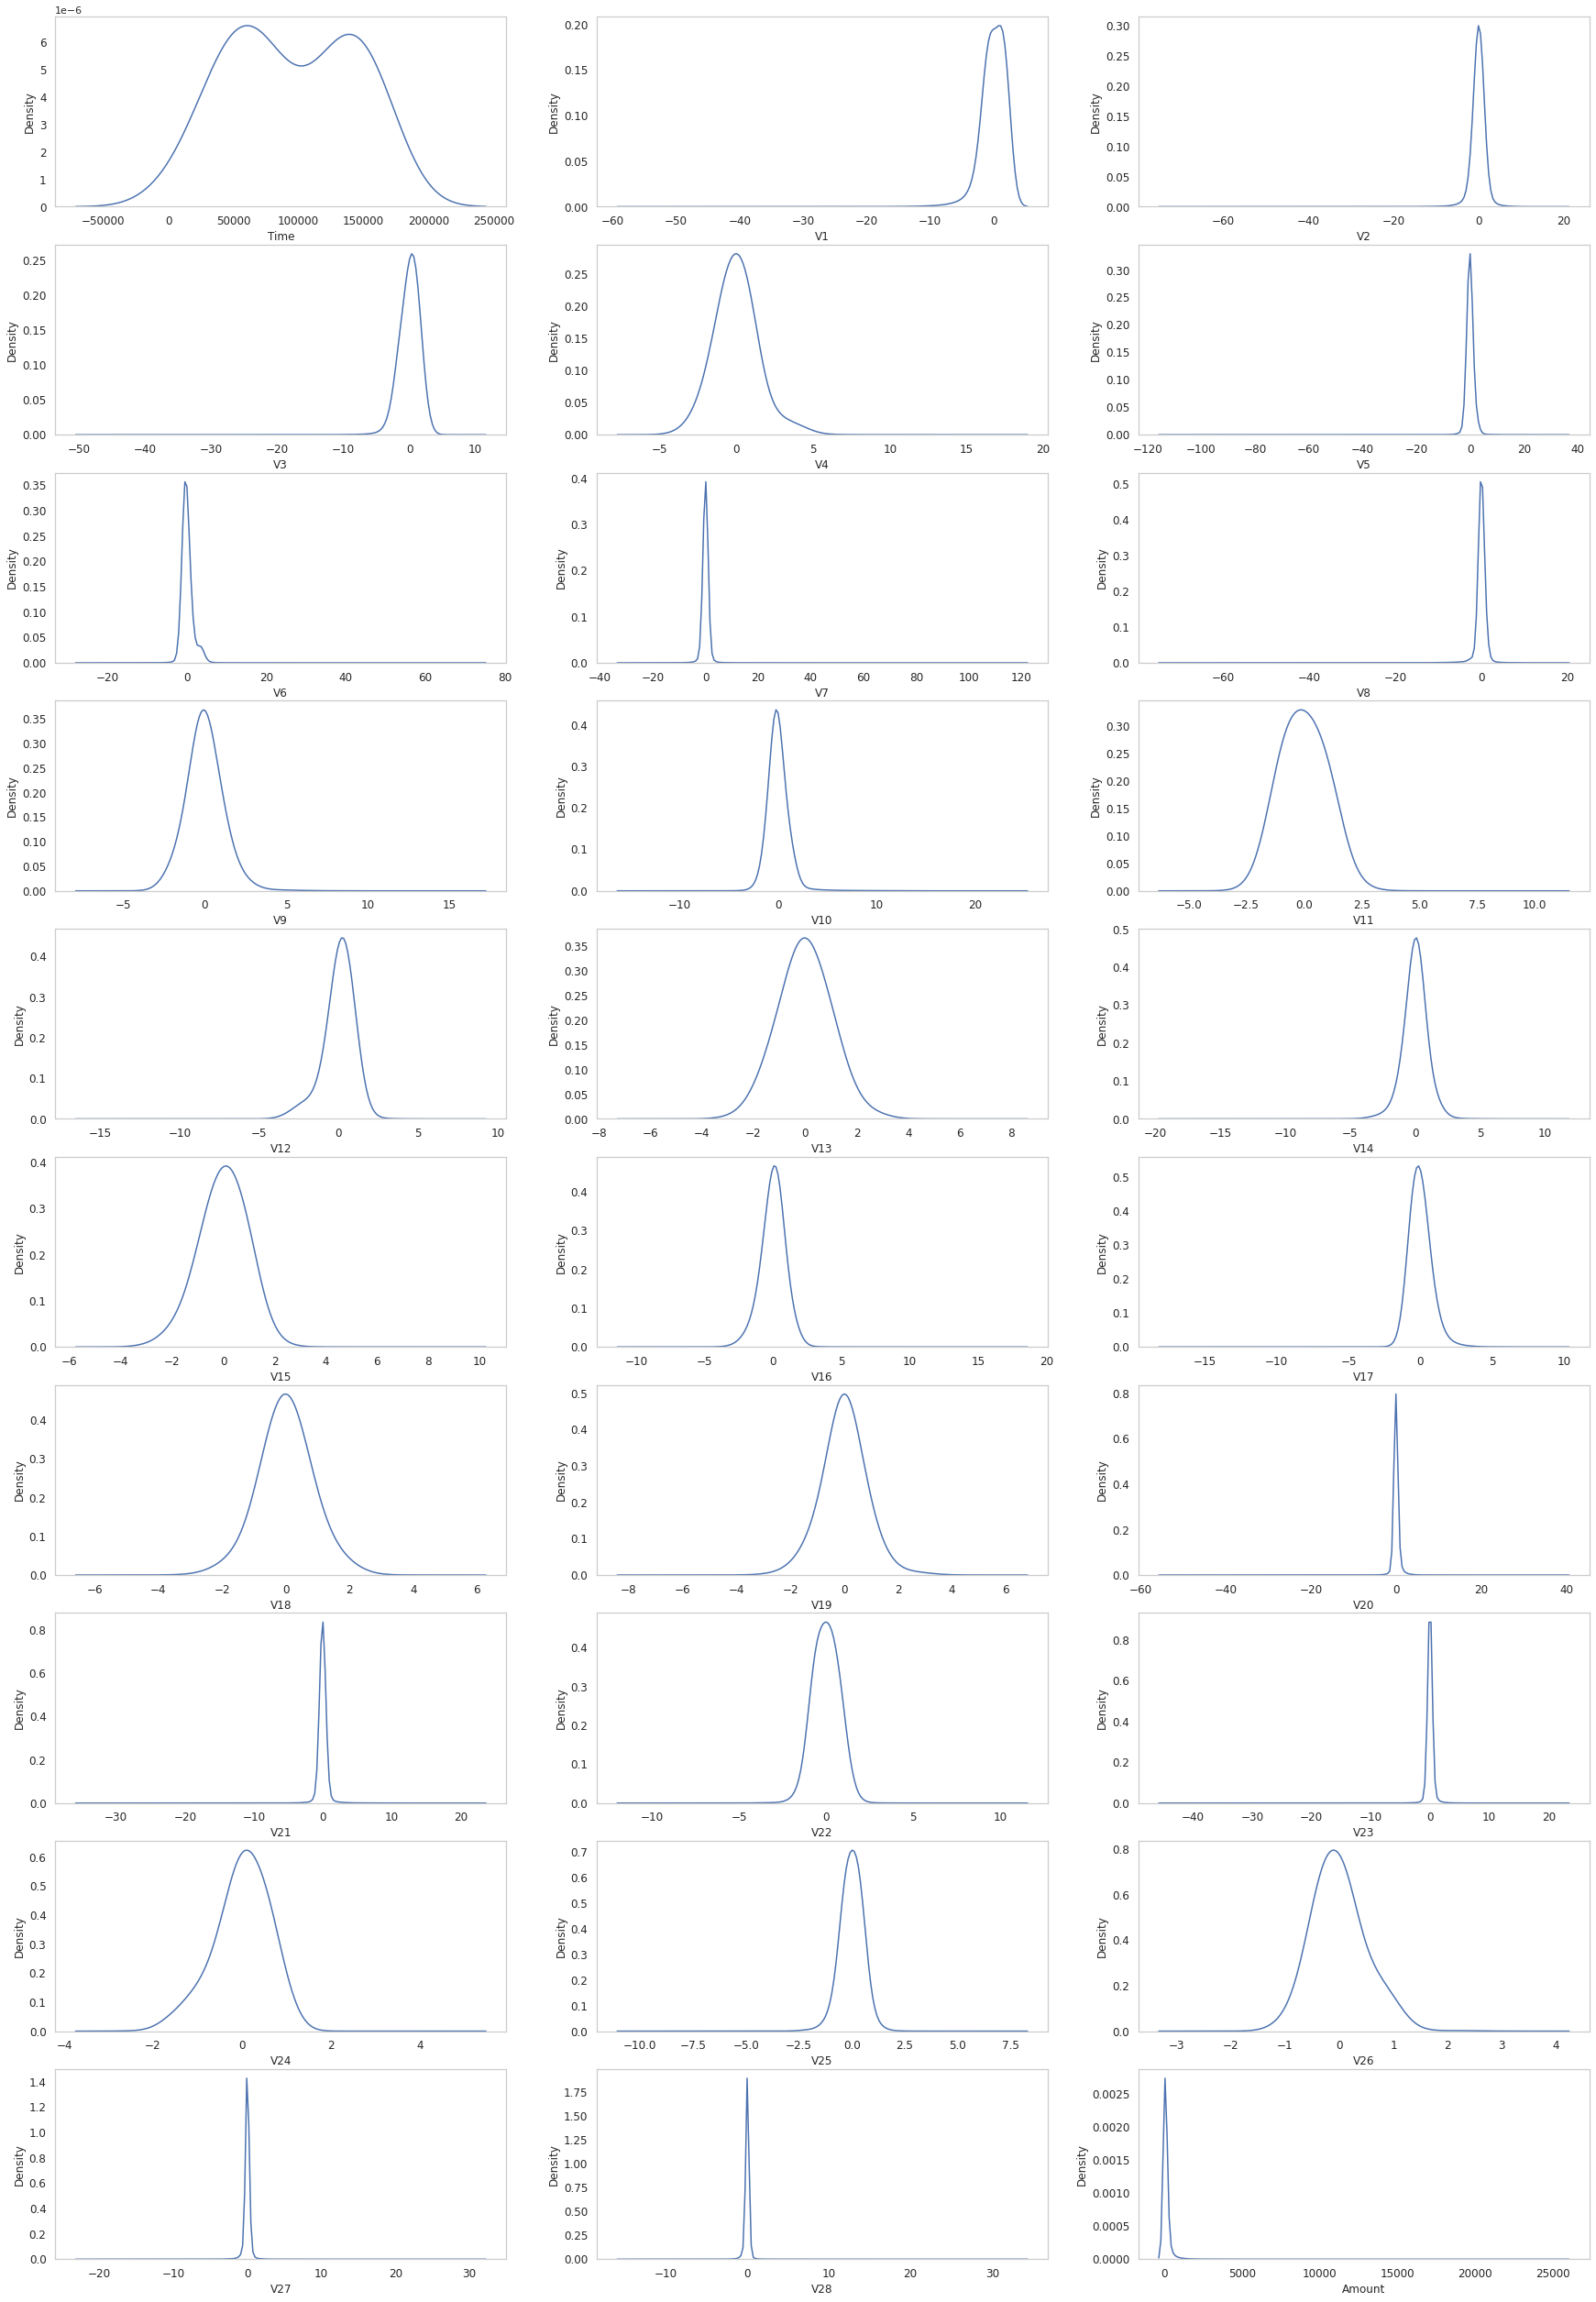

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0 & 1]
plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

**Korelasi Antar Variabel**

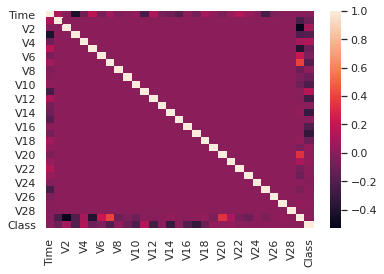

In [ ]:
corrMatrix=df.corr()
sns.heatmap(corrMatrix)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

#Data Preprocessing

**Penskalaan Numerik Variabel Time & Amount**

In [ ]:
Time_mean=df['Time'].mean(axis=0)
Time_std=df['Time'].std(axis=0)
df['Time']-=Time_mean
df['Time']/=Time_std

Amount_mean=df['Amount'].mean(axis=0)
Amount_std=df['Amount'].std(axis=0)
df['Amount']-=Amount_mean
df['Amount']/=Amount_std

In [ ]:
print(df.max(axis=0)['Time'])
print(df.max(axis=0)['Amount'])

print(df.min(axis=0)['Time'])
print(df.min(axis=0)['Amount'])

1.6420548508995223
102.36206300453635
-1.9965795183032333
-0.3532287728453702


**Kombinasi Upsampling & Downsampling**

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=150000)
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Class.value_counts()

0    150000
1       492
Name: Class, dtype: int64

In [ ]:
# Separate majority and minority classes
df_majority = df_downsampled[df_downsampled.Class==0]
df_minority = df_downsampled[df_downsampled.Class==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=150000)
 
# Combine majority class with upsampled minority class
df_Combi = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_Combi.Class.value_counts()

1    150000
0    150000
Name: Class, dtype: int64

**Separasi**

In [ ]:
x = df_Combi.iloc[:, :-1].values
y = df_Combi.iloc[:, -1].values

#Pemilihan, Fitting dan Evaluasi Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

**Model tanpa hyperparameter tuning**

In [ ]:
model=models.Sequential()
model.add(layers.Dense(6, kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
5250/5250 [==============================] - 9s 1ms/step - loss: 0.4925 - accuracy: 0.7844 - val_loss: 0.1630 - val_accuracy: 0.9450
Epoch 2/5
5250/5250 [==============================] - 7s 1ms/step - loss: 0.2442 - accuracy: 0.9167 - val_loss: 0.1635 - val_accuracy: 0.9480
Epoch 3/5
5250/5250 [==============================] - 7s 1ms/step - loss: 0.2304 - accuracy: 0.9201 - val_loss: 0.1716 - val_accuracy: 0.9488
Epoch 4/5
5250/5250 [==============================] - 7s 1ms/step - loss: 0.2288 - accuracy: 0.9186 - val_loss: 0.1677 - val_accuracy: 0.9496
Epoch 5/5
5250/5250 [==============================] - 7s 1ms/step - loss: 0.2252 - accuracy: 0.9202 - val_loss: 0.1783 - val_accuracy: 0.9485


In [ ]:
model.evaluate(x_test,y_test)

1875/1875 [==============================] - 2s 809us/step - loss: 0.1798 - accuracy: 0.9465


[0.17984521389007568, 0.9465333223342896]

**Prediksi Model**

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[5286]

array([0.9999188], dtype=float32)

In [ ]:
y_test[5286]

1

**Evaluasi Model**

In [ ]:
#Performance Metric
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, precision_score, auc, roc_curve, recall_score, classification_report 

predictions_class=model.predict_classes(x_test)

#Classification Report
print(classification_report(y_test,predictions_class))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.95      0.94      0.95     30103
           1       0.94      0.95      0.95     29897

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test,predictions_class))

[[28368  1735]
 [ 1473 28424]]


In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, predictions_class)
print('Accuracy: %f' % accuracy)

#Precision
precision = precision_score(y_test, predictions_class)
print('Precision: %f' % precision)

#Recall
recall = recall_score(y_test, predictions_class)
print('Recall: %f' % recall)

#F1 score
f1 = f1_score(y_test, predictions_class)
print('F1 score: %f' % f1)

Accuracy: 0.946533
Precision: 0.942472
Recall: 0.950731
F1 score: 0.946583


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


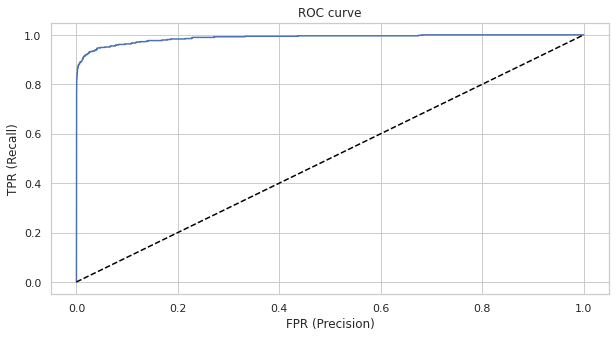

Area under curve (AUC):  0.988223901185964


In [ ]:
#ROC Curve
y_score = model.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

**Model dengan hyperparameter tuning**

In [ ]:
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from livelossplot.tf_keras import PlotLossesCallback

def model_builder(hp):
    model = keras.Sequential()
 
    # Tune the model hyperparameters
    model.add(keras.layers.Dense(units = hp.Int('units1',
                                                min_value = 32, 
                                                max_value = 512, 
                                                step = 32), 
                                 activation = 'relu'))
    model.add(keras.layers.Dense(units = hp.Int('units2',
                                                min_value = 32, 
                                                max_value = 512, 
                                                step = 32), 
                                 activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    
    # Tune the algorithm hyperparameters
    model.compile(optimizer = keras.optimizers.Adam(
                              hp.Choice('learning_rate', 
                                        values = [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


tuner = BayesianOptimization(model_builder,
                             objective = 'val_accuracy', 
                             max_trials = 10,
                             directory = 'Hasil',
                             project_name = 'CreditCards')

# Search the optimal hyperparameters
earlystopping = keras.callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True)

tuner.search(x_train, y_train, batch_size=256, epochs = 50, 
             validation_data = (x_val, y_val), callbacks =[earlystopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in h1 is {best_hps.get('units1')} 
The optimal number of units in h2 is {best_hps.get('units2')} 
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

Trial 10 Complete [00h 03m 30s]
val_accuracy: 0.9998055696487427

Best val_accuracy So Far: 0.9998055696487427
Total elapsed time: 00h 17m 19s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. 
The optimal number of units in h1 is 480 
The optimal number of units in h2 is 512 
The optimal learning rate for the optimizer is 0.0001.



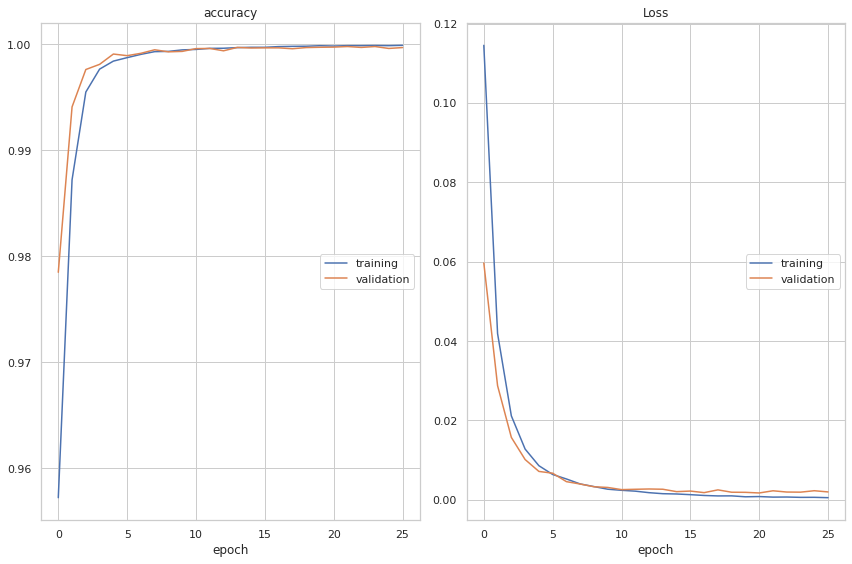

accuracy
	training         	 (min:    0.957, max:    1.000, cur:    1.000)
	validation       	 (min:    0.979, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.001, max:    0.115, cur:    0.001)
	validation       	 (min:    0.002, max:    0.060, cur:    0.002)


In [ ]:
# Retrain model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

model.fit(x_train, y_train, batch_size=256, epochs = 50, 
          validation_data = (x_val, y_val), 
          callbacks=[earlystopping, PlotLossesCallback()],
          verbose=0, use_multiprocessing=True)


In [ ]:
model.evaluate(x_test,y_test)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0015 - accuracy: 0.9996


[0.001497092074714601, 0.9995833039283752]

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, precision_score, auc, roc_curve, recall_score, classification_report 

predictions_class=model.predict_classes(x_test)

print(confusion_matrix(y_test,predictions_class))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[30078    25]
 [    0 29897]]


In [ ]:
print(classification_report(y_test,predictions_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30103
           1       1.00      1.00      1.00     29897

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, predictions_class)
print('Accuracy: %f' % accuracy)

#Precision
precision = precision_score(y_test, predictions_class)
print('Precision: %f' % precision)

#Recall
recall = recall_score(y_test, predictions_class)
print('Recall: %f' % recall)

#F1 score
f1 = f1_score(y_test, predictions_class)
print('F1 score: %f' % f1)

Accuracy: 0.999583
Precision: 0.999164
Recall: 1.000000
F1 score: 0.999582


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


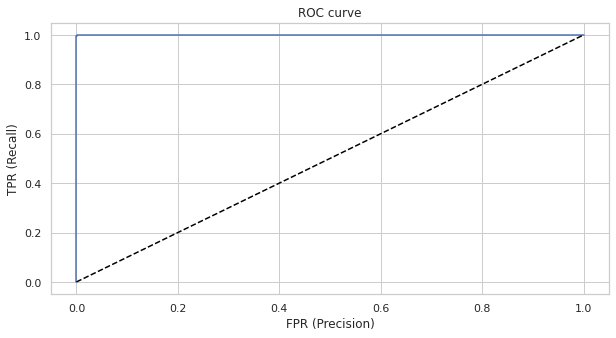

Area under curve (AUC):  0.999991948793983


In [ ]:
y_score = model.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

**Periksa performa model pada data full (tanpa kombinasi upsampling & downsampling)**

(semua data kelas 1 diprediksi tepat semua)

In [ ]:
x_o = df.iloc[:, :-1].values
y_o = df.iloc[:, -1].values
model.evaluate(x_o,y_o)

8901/8901 [==============================] - 14s 2ms/step - loss: 0.0024 - accuracy: 0.9994


[0.002380926860496402, 0.9994382262229919]

In [ ]:
predictions_class_o = model.predict_classes(x_o)
print(confusion_matrix(y_o,predictions_class_o))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[284155    160]
 [     0    492]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


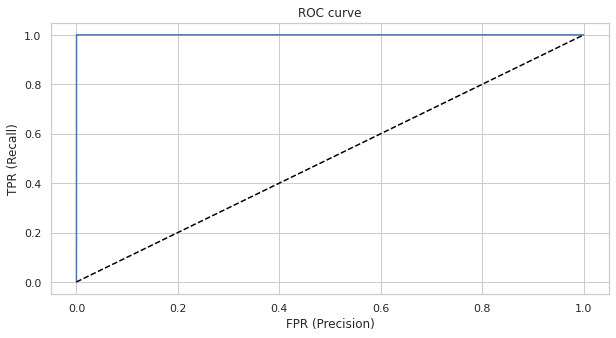

Area under curve (AUC):  0.9999668615867349


In [ ]:
y_score = model.predict_proba(x_o)
fpr, tpr, _ = roc_curve(y_o, y_score)

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))